In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

In [2]:
df=pd.read_csv("AutoData.csv")
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [4]:
#checking for null values in the data
df.isnull().any()

symboling           False
make                False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [5]:
#checking for "repeated/duplicated" data 
df[df.duplicated()]

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [6]:
 #safety rating(Symboling)

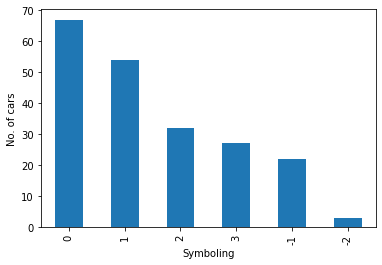

In [7]:
g1=df.symboling.value_counts().plot(kind='bar')
g1.set(xlabel='Symboling',ylabel='No. of cars')
plt.show()

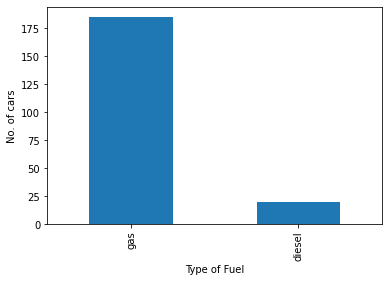

In [8]:

g2=df.fueltype.value_counts().plot(kind='bar')
g2.set(xlabel='Type of Fuel',ylabel='No. of cars')
plt.show()

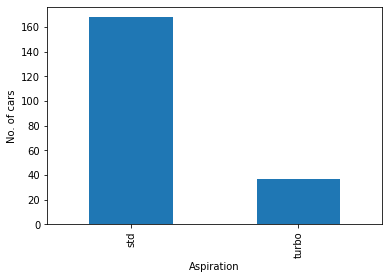

In [9]:
g3=df.aspiration.value_counts().plot(kind='bar')
g3.set(xlabel='Aspiration',ylabel='No. of cars')
plt.show()

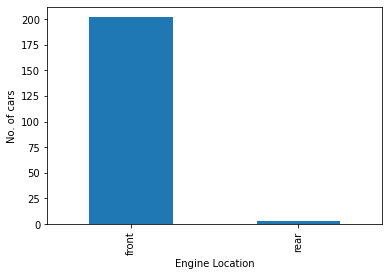

In [10]:
g4=df.enginelocation.value_counts().plot(kind='bar')
g4.set(xlabel='Engine Location',ylabel='No. of cars')
plt.show()

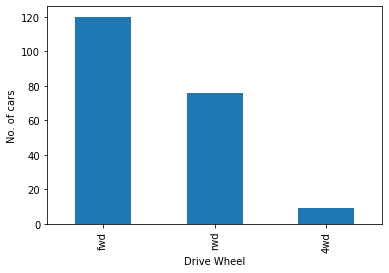

In [11]:
g4=df.drivewheel.value_counts().plot(kind='bar')
g4.set(xlabel='Drive Wheel',ylabel='No. of cars')
plt.show()

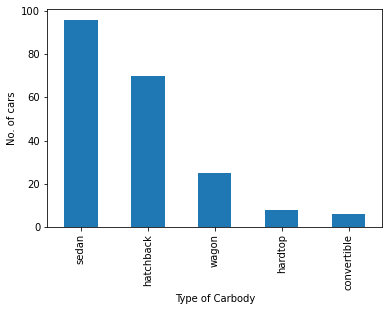

In [12]:
g5=df.carbody.value_counts().plot(kind='bar')
g5.set(xlabel='Type of Carbody',ylabel='No. of cars')
plt.show()

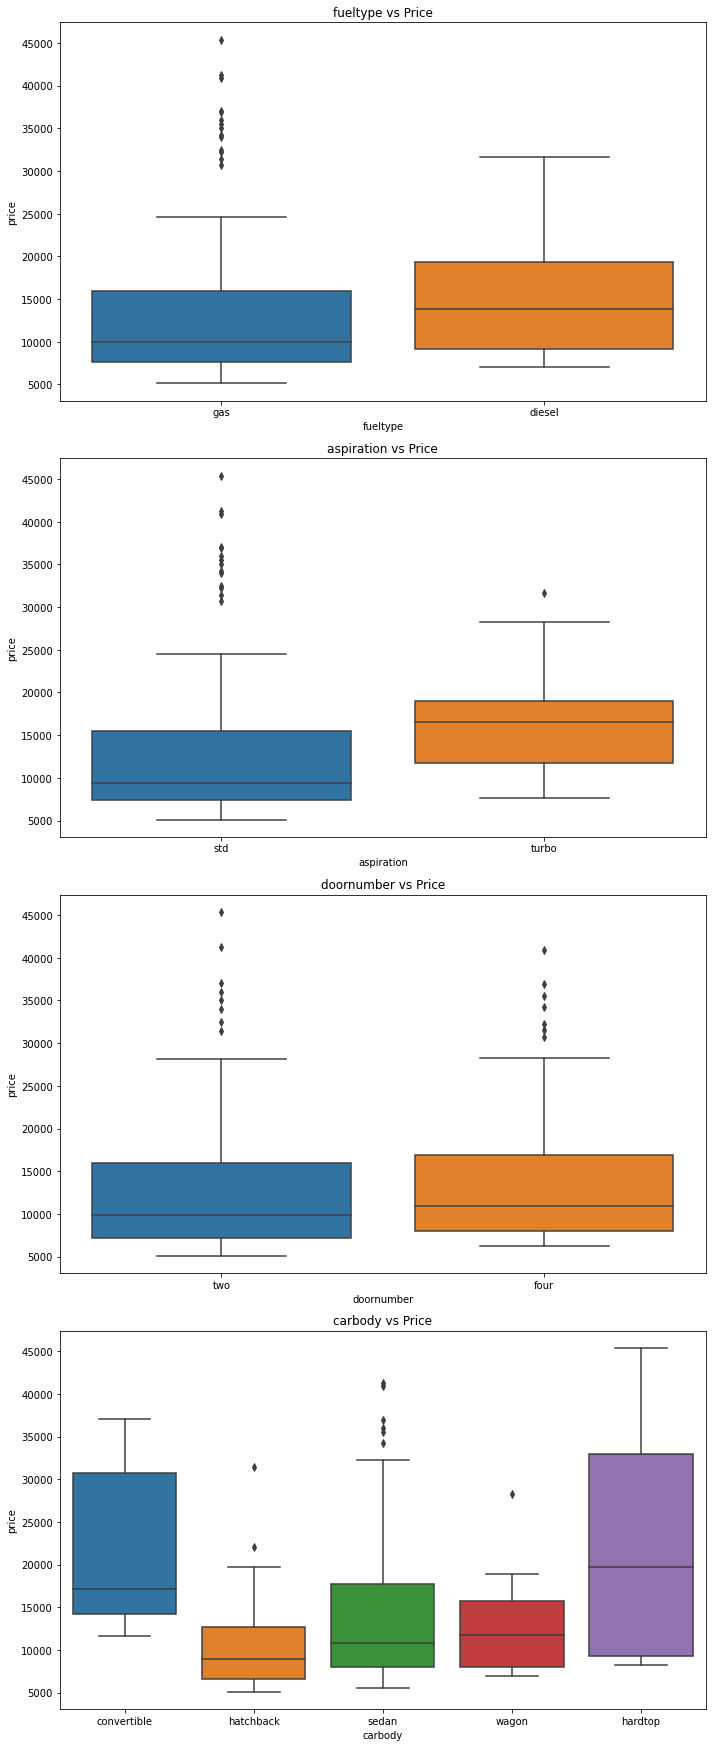

In [13]:
def price_variation(x,n):
    plt.subplot(5,1,n)
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x], y=df.price)
plt.figure(figsize=(10,30))    
price_variation('fueltype',1)
price_variation('aspiration',2)
price_variation('doornumber',3)
price_variation('carbody',4)
# price_variation(x)
plt.tight_layout()

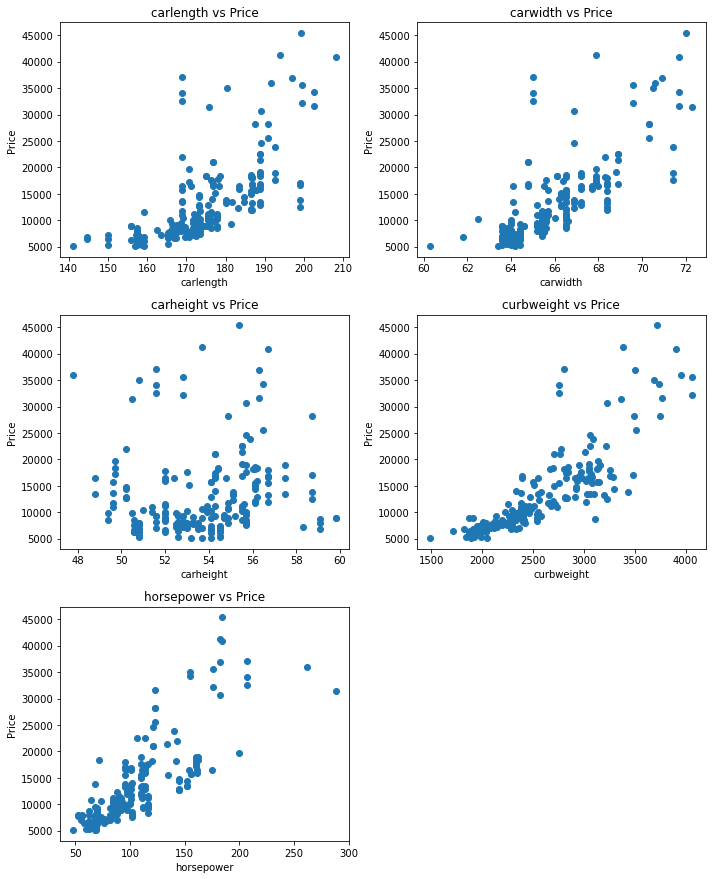

In [14]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)
scatter('horsepower',5)

plt.tight_layout()

Carwidth, carlength and curbweight seems to have a poitive correlation with price.
Carheight doesn't show any significant trend with price.

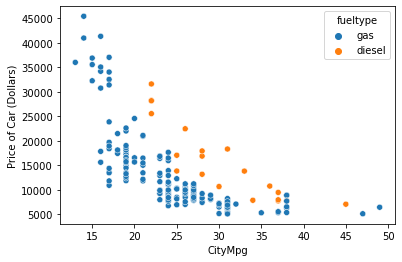

In [15]:
plt1 = sns.scatterplot(x = 'citympg', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('CityMpg')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

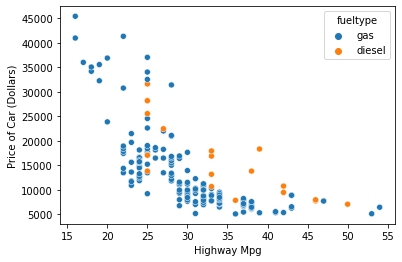

In [16]:
plt1 = sns.scatterplot(x = 'highwaympg', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('Highway Mpg')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

In [17]:
df['mileage'] = df['citympg']*0.55 + df['highwaympg']*0.45

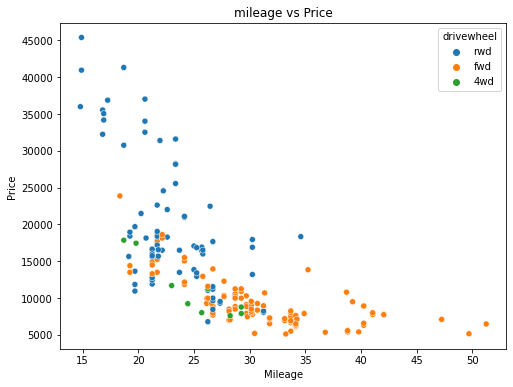

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(8,6))

plt.title('mileage vs Price')
sns.scatterplot(x=df['mileage'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('Mileage')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

In [19]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'mileage'],
      dtype='object')

In [20]:
auto = df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'mileage']]

In [21]:
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,19.80


<Figure size 1080x1080 with 0 Axes>

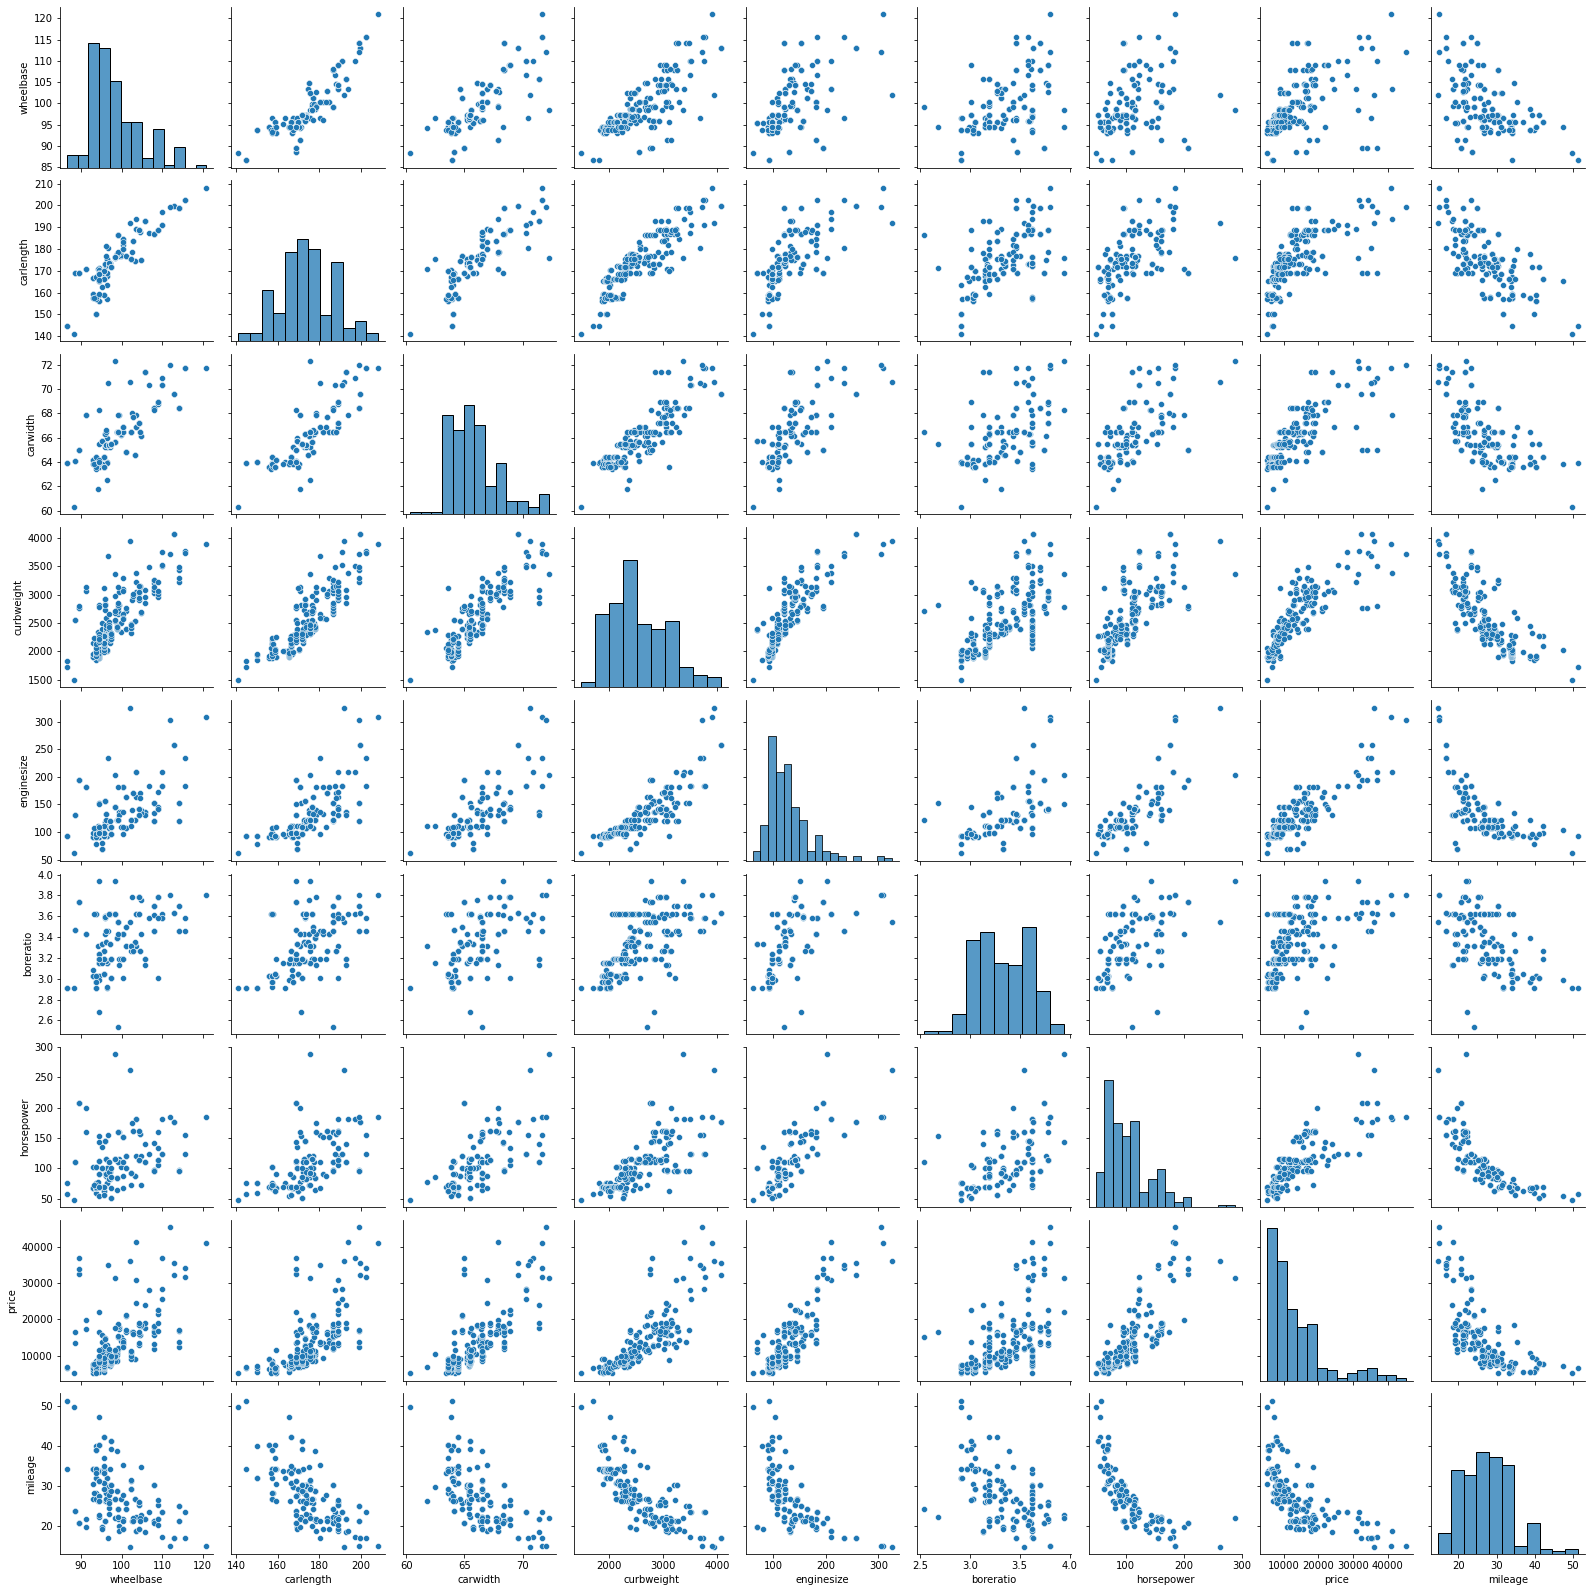

In [22]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show() # dimensionality reduction pca, t-sne

### Categorical Variables are converted into Neumerical Variables with the help of Dummy Variable

In [23]:
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)

In [24]:
auto = pd.concat([auto, cyl_no], axis = 1)

In [25]:
auto.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,...,boreratio,horsepower,price,mileage,five,four,six,three,twelve,two
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,...,3.47,111,13495.0,23.70,0,1,0,0,0,0
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,...,3.47,111,16500.0,23.70,0,1,0,0,0,0
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,...,2.68,154,16500.0,22.15,0,0,1,0,0,0
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,...,3.19,102,13950.0,26.70,0,1,0,0,0,0
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,...,3.19,115,17450.0,19.80,1,0,0,0,0,0


In [26]:
eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)

In [27]:
auto = pd.concat([auto, eng_typ], axis = 1)

In [28]:
drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)

In [29]:
auto = pd.concat([auto, drwh], axis = 1)

In [30]:
carb = pd.get_dummies(auto['carbody'], drop_first = True)

In [31]:
auto = pd.concat([auto, carb], axis = 1)

In [32]:
asp = pd.get_dummies(auto['aspiration'], drop_first = True)

In [33]:
auto = pd.concat([auto, asp], axis = 1)

In [34]:
fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)

In [35]:
auto = pd.concat([auto, fuelt], axis = 1)

In [36]:
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber'], axis = 1, inplace = True)

In [37]:
auto.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,23.70,0,...,0,0,0,1,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,23.70,0,...,0,0,0,1,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,22.15,0,...,1,0,0,1,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,26.70,0,...,0,0,1,0,0,0,1,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,19.80,1,...,0,0,0,0,0,0,1,0,0,1


In [38]:
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)


In [39]:
scaler = MinMaxScaler()

In [40]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price', 'mileage']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-40-ae171d6b8ba9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
G:\datascienceware\Anaconda\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [41]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,turbo,gas
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0.530864,0,...,0,0,1,0,0,0,1,0,0,1
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0.213992,0,...,0,0,0,1,0,1,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0.344307,0,...,0,0,0,1,0,1,0,0,0,1
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0.244170,0,...,0,0,0,1,0,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0.122085,0,...,0,0,0,1,0,0,0,1,1,1


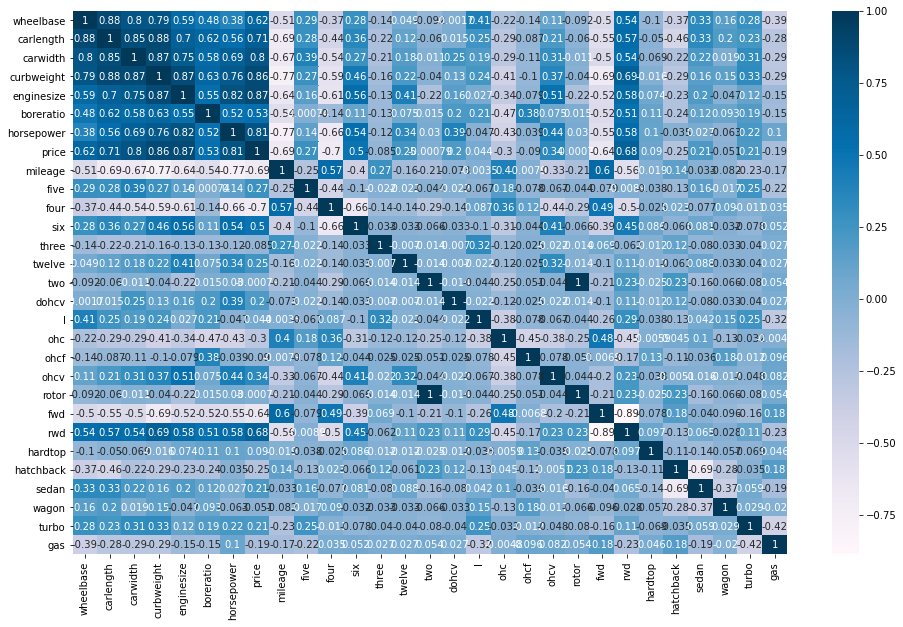

In [42]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True,cmap="PuBu")
plt.show()

In [43]:
y_train = df_train.pop('price')
X_train = df_train

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)#fit and fit transform

LinearRegression()

In [45]:
rfe = RFE(lm,  n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', False, 8),
 ('carwidth', False, 9),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 12),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('five', False, 4),
 ('four', True, 1),
 ('six', False, 3),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 15),
 ('dohcv', False, 2),
 ('l', False, 13),
 ('ohc', False, 5),
 ('ohcf', False, 7),
 ('ohcv', False, 10),
 ('rotor', False, 16),
 ('fwd', False, 19),
 ('rwd', False, 11),
 ('hardtop', False, 6),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('turbo', False, 18),
 ('gas', False, 17)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'curbweight', 'enginesize', 'horsepower', 'mileage',
       'four', 'twelve', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

In [48]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [49]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [50]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [51]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     81.91
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.26e-51
Time:                        20:25:37   Log-Likelihood:                 158.15
No. Observations:                 143   AIC:                            -294.3
Df Residuals:                     132   BIC:                            -261.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0291      0.061      0.479      0.633      -0.091       0.149
wheelbase      0.1371      0.076      1.797      0.075      -0.014       0.288
curbweight     0.3185      0.124      2.579      0.011       0.074       0.563
enginesize     0.2936      0.130      2.267      0.025       0.037       0.550
horsepower     0.3630      0.105      3.449      0.001       0.155       0.571
mileage        0.1083      0.072      1.504      0.135      -0.034       0.251
four          -0.0959      0.022     -4.306      0.000      -0.140      -0.052
twelve        -0.0653      0.100     -0.653      0.515      -0.263       0.132
hatchback     -0.1356      0.038     -3.594      0.000      -0.210      -0.061
sedan         -0.1048      0.039     -2.716      0.007      -0.181      -0.028
wagon         -0.1528      0.042     -3.607      0.000      -0.237      -0.069
==============================================================================
Omnibus:                       25.191   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.434
Skew:                           0.396   Prob(JB):                     7.05e-27
Kurtosis:                       7.426   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.00
2,curbweight,13.92
3,enginesize,8.20
9,sedan,7.65
8,hatchback,6.61
4,horsepower,6.20
1,wheelbase,5.03
10,wagon,4.26
5,mileage,3.66
6,four,1.96


In [53]:
# Dropping curbweight as p-value is high.
X_train_new1 = X_train_rfe.drop(["twelve"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     91.36
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.58e-52
Time:                        20:25:37   Log-Likelihood:                 157.92
No. Observations:                 143   AIC:                            -295.8
Df Residuals:                     133   BIC:                            -266.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0357      0.060      0.597      0.5

In [54]:
# Dropping hardtop as p value is high.
X_train_new2 = X_train_new1.drop(["mileage"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     101.5
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           4.77e-53
Time:                        20:25:37   Log-Likelihood:                 156.68
No. Observations:                 143   AIC:                            -295.4
Df Residuals:                     134   BIC:                            -268.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0929      0.047      1.983      0.0

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.91
2,curbweight,12.04
7,sedan,7.24
6,hatchback,6.27
3,enginesize,5.91
1,wheelbase,4.95
4,horsepower,4.76
8,wagon,4.01
5,four,1.90


In [56]:
#Dropping mileage as p-value is high.
X_train_new3 = X_train_new2.drop(["curbweight"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           5.82e-53
Time:                        20:25:37   Log-Likelihood:                 153.89
No. Observations:                 143   AIC:                            -291.8
Df Residuals:                     135   BIC:                            -268.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1173      0.046      2.530      0.0

In [57]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.62
6,sedan,6.81
5,hatchback,5.96
2,enginesize,4.64
7,wagon,4.01
3,horsepower,3.81
1,wheelbase,2.13
4,four,1.88


In [58]:
# Dropping sedan as VIF value is high.
X_train_new4 = X_train_new3.drop(["sedan"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new4)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     119.7
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           9.23e-52
Time:                        20:25:38   Log-Likelihood:                 148.34
No. Observations:                 143   AIC:                            -282.7
Df Residuals:                     136   BIC:                            -261.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0151      0.036      0.422      0.6

In [59]:
# Dropping wagon as p value is high.
X_train_new5 = X_train_new4.drop(["wagon"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new5)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     141.8
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           2.38e-52
Time:                        20:25:38   Log-Likelihood:                 147.10
No. Observations:                 143   AIC:                            -282.2
Df Residuals:                     137   BIC:                            -264.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0118      0.036      0.330      0.7

In [60]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.50
2,enginesize,4.35
3,horsepower,3.78
4,four,1.87
1,wheelbase,1.74
5,hatchback,1.24


In [61]:
# Dropping wagon as p value is high.
X_train_new6 = X_train_new5.drop(["wheelbase"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new6)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     155.8
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           3.85e-50
Time:                        20:25:38   Log-Likelihood:                 139.05
No. Observations:                 143   AIC:                            -268.1
Df Residuals:                     138   BIC:                            -253.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0774      0.034      2.299      0.0

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,18.68
2,horsepower,3.67
1,enginesize,3.57
3,four,1.84
4,hatchback,1.15


Residual Analysis of the train data So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like

In [63]:
y_train_price = lm.predict(X_train_lm)

G:\datascienceware\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

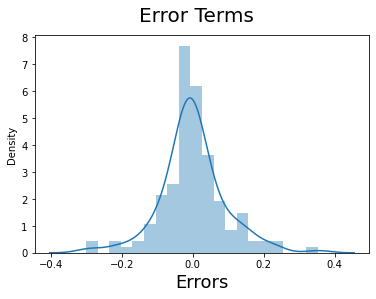

In [64]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

#### Making Predictions Applying the scaling on the test sets

In [65]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_test[num_vars] = scaler.transform(df_test[num_vars])

<ipython-input-65-0031589cf44c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.transform(df_test[num_vars])
G:\datascienceware\Anaconda\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [66]:
y_test = df_test.pop('price')
X_test = df_test

In [67]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['enginesize', 'horsepower','four' , 'hatchback']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [68]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [69]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8443342248717329

Text(0, 0.5, 'y_pred')

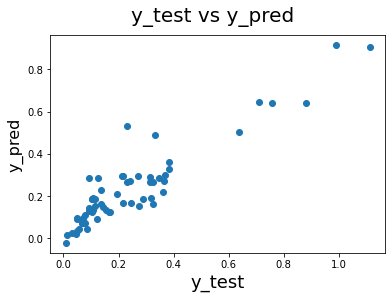

In [70]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

we can conclude that our price depends on the following factors:

Engine size,Horsepower,Four cylinders,Hatchback.

As we can see the above stated factors are linearly corelated with price as we can see from the above chart.